This code imports essential libraries for data analysis, preprocessing, visualization, and machine learning tasks, including scaling, splitting data, evaluating model accuracy, and plotting ROC curves. 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

pd.read_csv(): Reads the dataset into a Pandas DataFrame.
data.head(): Provides a quick overview of the first few rows to understand the structure and content of the dataset.


In [4]:
data=pd.read_csv('OneDrive/Desktop/MLLAB/diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

The data.describe() function provides a summary of the numerical columns in the dataset.

In [6]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

This code replaces zero values in the Glucose, BloodPressure, SkinThickness, BMI, and Insulin columns with their respective column means. It ensures no invalid zero values skew the dataset or affect the analysis.

In [8]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

The data.describe() function provides a summary of the numerical columns in the dataset.


In [10]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

This code removes outliers from the dataset by filtering out the top percentages of extreme values (e.g., top 2%, 1%, or 5%) in specific columns such as Pregnancies, BMI, SkinThickness, Insulin, DiabetesPedigreeFunction, and Age. It ensures the dataset is cleaner and less influenced by extreme values.

In [12]:
q = data['Pregnancies'].quantile(0.98)
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

The data_cleaned.head() command displays the first five rows of the cleaned dataset. This allows you to verify the structure and contents of the dataset after removing outliers. It helps ensure that the cleaning process worked as expected.

In [14]:
data_cleaned.head()

Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
0            6    148.0           72.0      35.000000  79.799479  33.6   
1            1     85.0           66.0      29.000000  79.799479  26.6   
2            8    183.0           64.0      20.536458  79.799479  23.3   
3            1     89.0           66.0      23.000000  94.000000  28.1   
5            5    116.0           74.0      20.536458  79.799479  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0

The data_cleaned.describe() function provides statistical summaries of the cleaned dataset

In [16]:
data_cleaned.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   674.000000  674.000000     674.000000     674.000000  674.000000   
mean      3.602374  119.217318      71.994622      25.721354  101.061453   
std       3.011478   29.272890      11.891728       8.507237   49.005425   
min       0.000000   44.000000      24.000000       8.000000   15.000000   
25%       1.000000   99.000000      64.000000      20.536458   79.799479   
50%       3.000000  114.500000      72.000000      22.000000   79.799479   
75%       6.000000  136.000000      80.000000      32.000000  111.500000   
max      11.000000  199.000000     122.000000      49.000000  291.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  674.000000                674.000000  674.000000  674.000000  
mean    31.904204                  0.447338   32.454006    0.327893  
std      6.384238                  0.285170   10.964692    0.469794  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.238000   24.000000    0.000000  
50%     31.992578                  0.356000   29.000000    0.000000  
75%     35.800000                  0.600000   39.000000    1.000000  
max     50.000000                  1.476000   66.000000    1.000000

This code creates a grid of histograms for each column in the data_cleaned dataset to visualize their distributions.

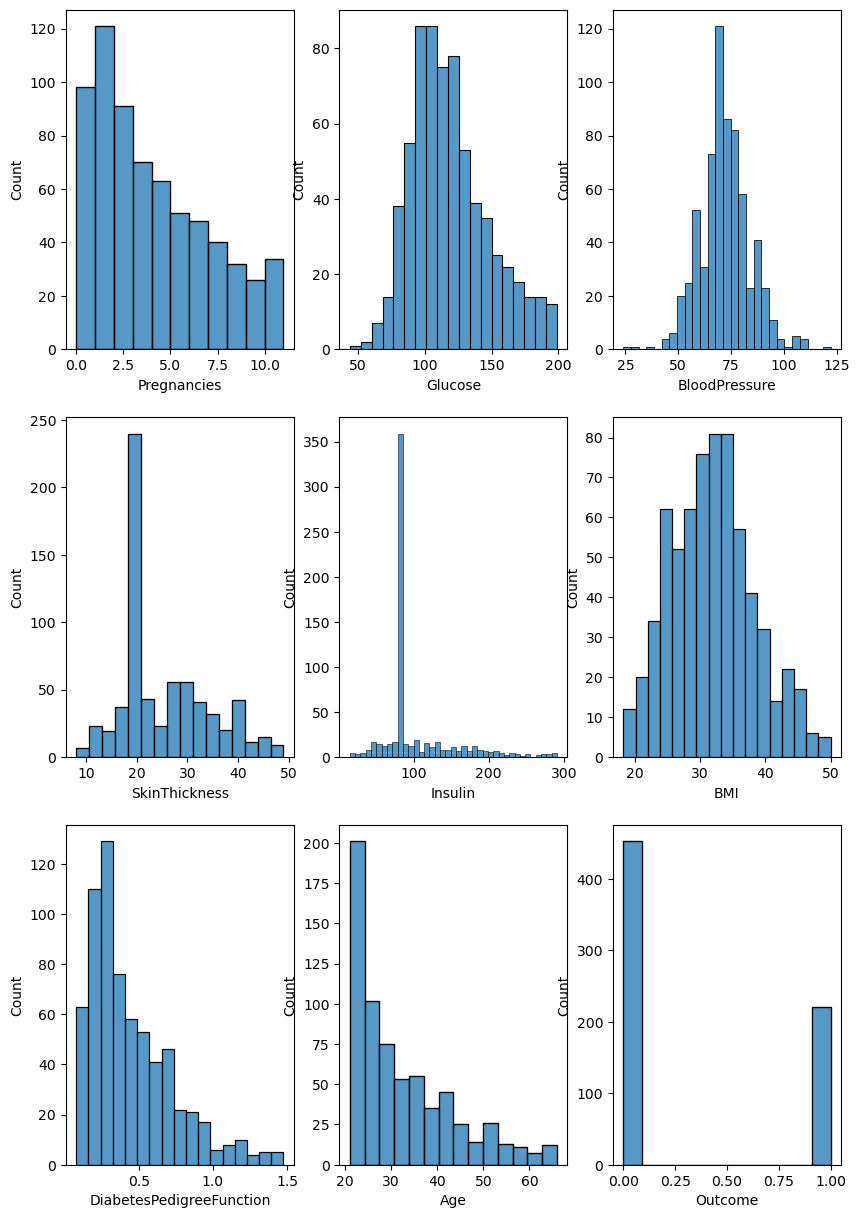

In [18]:
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1
for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data_cleaned[column])
        plt.xlabel(column,fontsize=10)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

This code separates the features (X) and target (y) variables from the data_cleaned dataset:
X: Contains all the columns except Outcome, which are the input features for the model.
y: Contains only the Outcome column, which is the target variable you want to predict.


In [20]:
X = data_cleaned.drop(columns = ['Outcome'])
y = data_cleaned['Outcome']

We use `StandardScaler` to standardize `X`, ensuring a mean of 0 and a standard deviation of 1.  
`fit_transform(X)` computes statistics and scales the data accordingly. 

In [22]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [23]:
X_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

We split the standardized data into training and testing sets using `train_test_split()`.  
`test_size=0.2` reserves 20% of the data for testing, and `random_state=355` ensures reproducibility.  

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.2, random_state = 355)

We import `GaussianNB` from `sklearn.naive_bayes` and initialize the model.  
Gaussian Naïve Bayes is a probabilistic classifier based on Bayes' theorem, assuming normal distribution of features.  


In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

We train the Naive Bayes model using `model.fit()` on the training data `X_train` and `y_train`.  
This step allows the model to learn patterns and relationships in the data.  

In [29]:
model.fit(x_train,y_train)


GaussianNB()

We use `model.predict()` to generate predictions for the test set `X_test`, stored in `y_pred`.  

In [31]:
y_pred = model.predict(x_test)

We use `accuracy_score()` to evaluate the model’s performance by comparing the predicted values `y_pred` with the actual values `y_test`.  

In [33]:
print(accuracy_score(y_test, y_pred))

0.7777777777777778


We use `confusion_matrix()` to compute the confusion matrix, comparing `y_test` with `y_pred` to evaluate the classification performance.  

In [35]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[80, 13],
       [17, 25]], dtype=int64)

We extract the individual values from the confusion matrix

In [37]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

We calculate accuracy using the formula

In [39]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7777777777777778

We calculate Precison using the formula

In [41]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8602150537634409

We calculate Recall using the formula

In [43]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8247422680412371

We calculate F1_Score using the formula

In [45]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8421052631578948

We calculate the Area Under the Curve (AUC) using `roc_auc_score()`, which measures the model's ability to distinguish between classes.  

In [78]:
auc = roc_auc_score(y_test, y_pred)
auc

0.727726574500768

We use `roc_curve()` to compute the False Positive Rate (`fpr`), True Positive Rate (`tpr`), and corresponding thresholds for the predictions.  

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

We plot the ROC curve using `plt.plot()`, showing the relationship between False Positive Rate (`fpr`) and True Positive Rate (`tpr`).  
The diagonal line represents a random classifier, and the area under the curve (`auc`) is displayed in the legend.  

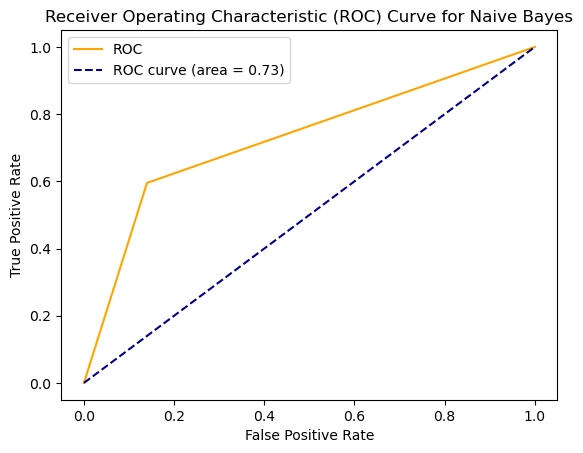

In [51]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()